In [2]:
import pyfor
import matplotlib.pyplot as plt

## Ground Filters, Bare Earth Models and Normalization

One of the most integral parts of LiDAR analysis is determining which points represent the ground. Once this step is completed, we can construct bare earth models (BEMs) and normalize our point clouds to produce reliable estimates of height, canopy height models and other products. 

pyfor has a dedicated module for handling ground filters, BEMs and normalization, `pyfor.ground_filter` and implements two major ground filtering algorithms, `KrausPfeifer1998` and `Zhang2003`. The user is free to use these classes, which are lower level implementations of the filters, or use the convenience wrappers in the `Cloud` object for quick default implementations.

### Normalization - The Quick Way

Many of you just want to normalize quickly and be done with the whole mess. Follow the instructions below to get a decent

In [18]:
# Load the point cloud
pc = pyfor.cloud.Cloud("my_las.las")

# Plot the raw cloud
pc.iplot3d(point_size=2)

<img src="images/raw_iplot.png" width="550">

In [13]:
# Call the normalization functions with some useful settings for the algorithm.
pc.normalize(cell_size=3)

<img src="images/norm_iplot.png" width="550">

As we can see, the point cloud is now normalized and ready for metric extraction.

## # Bare Earth Model (BEM)

Sometimes it is advantageous to view the bare earth model by itself as its own object. This way, we can diagnose the performance of our normalization routine, and save the BEM to its own file for other uses. This can be done via lower-level standalone ground filters stored in the `ground_filter` module. Standalone ground filters allow us to access much more information than the convenience wrappers in the previous section.

In [9]:
# Load the point cloud
from pyfor.ground_filter import KrausPfeifer1998
pc = pyfor.cloud.Cloud("/home/bryce/Programming/PyFor/pyfortest/data/test.las")

# Instantiate the filter
kp_filter = KrausPfeifer1998(pc, cell_size=4)
bem = kp_filter.bem(1)

/home/bryce/miniconda3/envs/pyfor_env/lib/python3.6/site-packages/pyfor/rasterizer.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/bryce/miniconda3/envs/pyfor_env/lib/python3.6/site-packages/pyfor/rasterizer.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Calling `.bem` on our filter object returns a `Raster` object, complete with its own plotting and writing function. We can now easily diagnose our ground filter and adjust our parameters as needed.

`Raster` objects have many useful features. For advanced users, we can access the numpy array of values where each element of the array corresponds to the `z` value in our BEM.

In [10]:
bem.array

array([[  nan,   nan,   nan, ..., 51.55,   nan,   nan],
       [  nan, 36.81, 37.23, ..., 38.27,   nan,   nan],
       [  nan, 36.79, 37.23, ..., 38.22, 37.82, 38.28],
       ...,
       [  nan, 40.67, 40.52, ..., 39.34,   nan,   nan],
       [  nan, 40.84, 40.46, ..., 39.19, 39.08, 39.11],
       [  nan, 40.85, 40.79, ..., 39.04, 38.84, 38.89]])

We also have our usual 2D plot at our disposal.

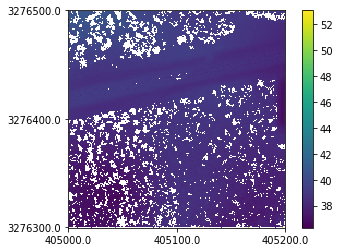

In [11]:
bem.plot()

Finally, if we have a coordinate reference system set to the "parent" `Cloud` object, we can save the file.

In [30]:
import pyproj
pc.crs = pyproj.Proj("+init=EPSG:4326").srs
bem.write("my_bem.tif")